# MLPs vs CNNs

In [79]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print('GPU Name:')
    !nvidia-smi -L

Num GPUs Available:  1
GPU Name:
GPU 0: Tesla T4 (UUID: GPU-831a7f72-a58e-35ce-2d54-c9102ddf28d7)


In [81]:
%matplotlib inline
sns.set_theme(context='talk', style='white')

## Daten importieren

In [82]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [83]:
X_train, y_train = X_train_full[-7500:], y_train_full[-7500:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (7500, 28, 28)
X_test shape: (10000, 28, 28)


In [84]:
X_train_full.shape

(60000, 28, 28)

In [85]:
X_train_full.dtype

dtype('uint8')

In [86]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

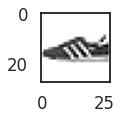

In [87]:
f, ax = plt.subplots(1,1, figsize=(2,2))

ax.imshow(X_train[0], cmap=plt.get_cmap('binary'))

f.tight_layout()
plt.show()

In [88]:
CLASS_NAMES = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
CLASS_NAMES[y_train[0]]

'Sneaker'

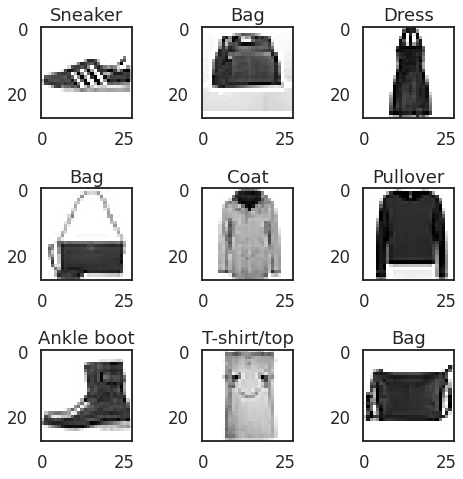

In [89]:
f, axes = plt.subplots(3, 3, figsize=(7,7))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap=plt.get_cmap('binary'))
    ax.set_title(CLASS_NAMES[y_train[i]])

f.tight_layout()
plt.show()

## Datenvorverarbeitung (Data preprocessing)

In [90]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [91]:
X_train.dtype

dtype('float64')

## Model with Sequential API

In [92]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",  # learning rate by default = 0.01
    metrics=["accuracy"]
)

Falls Trainingsset deutlich besser als Testset performt  --- Overfitting Gefahr

In [95]:
EPOCHS_MLP = 25

history = model.fit(X_train, y_train, epochs=EPOCHS_MLP, validation_split=0.2)

Epoch 1/25
188/188 [==============================] - 2s 5ms/step - loss: 0.7581 - accuracy: 0.7342 - val_loss: 0.5348 - val_accuracy: 0.8173
Epoch 2/25
188/188 [==============================] - 1s 4ms/step - loss: 0.5404 - accuracy: 0.8093 - val_loss: 0.5193 - val_accuracy: 0.8093
Epoch 3/25
188/188 [==============================] - 1s 4ms/step - loss: 0.4695 - accuracy: 0.8305 - val_loss: 0.4315 - val_accuracy: 0.8453
Epoch 4/25
188/188 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.8417 - val_loss: 0.4278 - val_accuracy: 0.8340
Epoch 5/25
188/188 [==============================] - 1s 4ms/step - loss: 0.3791 - accuracy: 0.8563 - val_loss: 0.4840 - val_accuracy: 0.8300
Epoch 6/25
188/188 [==============================] - 1s 4ms/step - loss: 0.3526 - accuracy: 0.8697 - val_loss: 0.4195 - val_accuracy: 0.8453
Epoch 7/25
188/188 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.8805 - val_loss: 0.4273 - val_accuracy: 0.8487
Epoch 

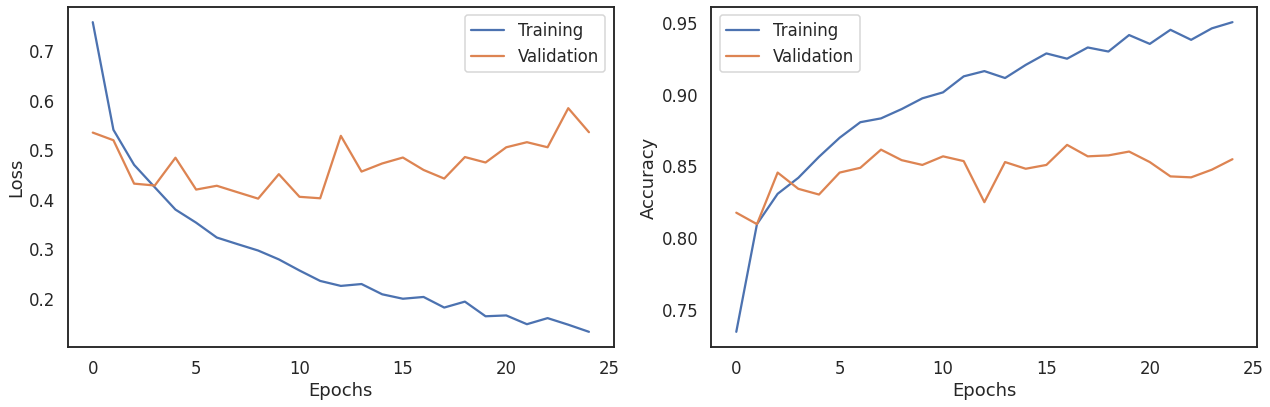

In [96]:
f, axes = plt.subplots(1,2, figsize=(18,6))

ax = axes[0]
sns.lineplot(x=range(EPOCHS_MLP), y=history.history['loss'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_MLP), y=history.history['val_loss'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")


ax = axes[1]
sns.lineplot(x=range(EPOCHS_MLP), y=history.history['accuracy'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_MLP), y=history.history['val_accuracy'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

f.tight_layout()
plt.show()

Hyperparameter-Tuning: 1. Learning rate verändern. 2. Anderen Optimizer 3. Anzahl Layer 4. Anzahl Neuronen per Layer 5. Activation function der Hidden-Layer

## Evaluierung

In [97]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5887 - accuracy: 0.8471


[0.5887202024459839, 0.847100019454956]

## Predict-Methode

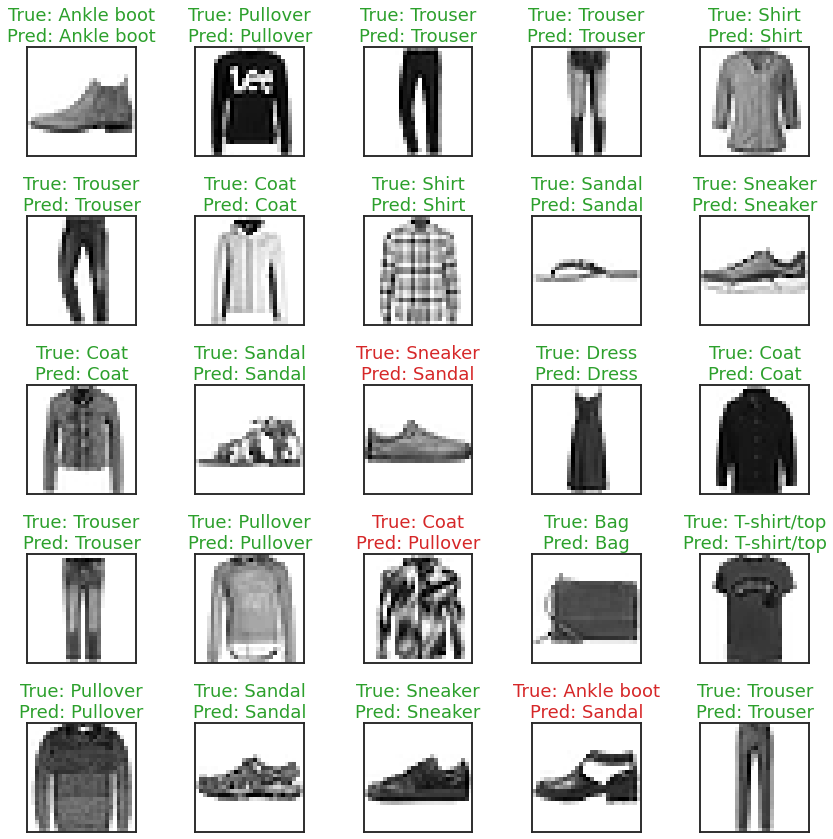

In [98]:
f, axes = plt.subplots(5, 5, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i], cmap=plt.get_cmap('binary'))

    y_prob = model.predict(X_test[i:i+1], verbose=False)
    y_pred = np.argmax(y_prob)

    title = f"True: {CLASS_NAMES[y_test[i]]}\n"
    title += f"Pred: {CLASS_NAMES[y_pred]}"

    color = 'tab:green' if y_pred == y_test[i] else 'tab:red'
    
    ax.set_title(title, color=color)

    ax.set_xticks([])
    ax.set_yticks([])

f.tight_layout()
plt.show()

In [99]:
y_proba = model.predict(X_test[:1], verbose=False).round(2) #Klassifizieren der Wahrscheinlichkeit für die ersten 3 Bilder im Testset

dict(zip(CLASS_NAMES, y_proba.flatten()))

{'T-shirt/top': 0.0,
 'Trouser': 0.0,
 'Pullover': 0.0,
 'Dress': 0.0,
 'Coat': 0.0,
 'Sandal': 0.0,
 'Shirt': 0.0,
 'Sneaker': 0.0,
 'Bag': 0.0,
 'Ankle boot': 1.0}

## Fremdes Bild einlesen

In [100]:
import urllib
import cv2


def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


img = url_to_image("https://i.imgur.com/NSgKLTU.jpeg")

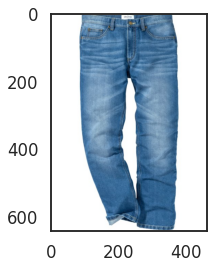

In [101]:
plt.imshow(img)
plt.show()

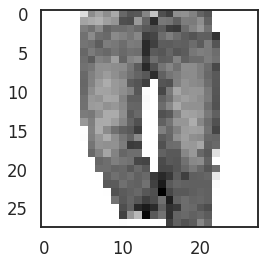

In [102]:
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

plt.imshow(img,cmap='binary')
plt.show()

In [103]:
img_array = np.array(img).reshape((1,28,28))

In [104]:
y_pred = model.predict(img_array)

y_pred

1/1 [==============================] - 0s 60ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [105]:
CLASS_NAMES[np.argmax(y_pred)]

'Dress'

## CNN - Convolutional Neural Network

In [118]:
model = keras.models.Sequential([
    keras.Input(shape=[28,28,1]),
    keras.layers.Conv2D(64, 7, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2), #each spatial dimension will be divided by factor 2
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu", padding="same"), #common practice to double the number of filters after each pooling layer
    keras.layers.Conv2D(256,3,activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(), #dense layer expects 1D array but Conv-layers have 2D array
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5), #reducing overfitting
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

'\nkernel_size = (3, 3)\npool_size = (2, 2)\n\n\nmodel = keras.models.Sequential()\n\nmodel.add(keras.Input(shape=[28,28,1]))\n\nmodel.add(keras.layers.Conv2D(8,kernel_size,padding=\'same\',activation="relu"))\nmodel.add(keras.layers.Conv2D(8, kernel_size,padding=\'same\',activation="relu"))\nmodel.add(keras.layers.MaxPooling2D(pool_size=pool_size))\n\nmodel.add(keras.layers.Conv2D(16, kernel_size,padding=\'same\',activation="relu"))\nmodel.add(keras.layers.Conv2D(16,kernel_size,padding=\'same\',activation="relu"))\nmodel.add(keras.layers.MaxPooling2D(pool_size=pool_size))\n\nmodel.add(keras.layers.Flatten())\nmodel.add(keras.layers.Dense(40,activation="relu"))\nmodel.add(keras.layers.Dense(10,activation="softmax"))\n'

In [119]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 256)        

In [120]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

## Reshape der Daten für CNN

In [121]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [122]:
X_train.shape

(7500, 28, 28, 1)

In [123]:
y_train.shape

(7500,)

In [124]:
EPOCHS_CNN = 25

In [125]:
history = model.fit(X_train,y_train, epochs=EPOCHS_CNN, validation_split=0.2)

Epoch 1/25
188/188 [==============================] - 5s 11ms/step - loss: 1.8288 - accuracy: 0.2945 - val_loss: 1.1021 - val_accuracy: 0.5487
Epoch 2/25
188/188 [==============================] - 1s 8ms/step - loss: 1.2773 - accuracy: 0.5022 - val_loss: 0.8337 - val_accuracy: 0.6513
Epoch 3/25
188/188 [==============================] - 2s 10ms/step - loss: 0.9909 - accuracy: 0.6172 - val_loss: 0.7333 - val_accuracy: 0.7040
Epoch 4/25
188/188 [==============================] - 2s 9ms/step - loss: 0.8655 - accuracy: 0.6633 - val_loss: 0.5677 - val_accuracy: 0.8133
Epoch 5/25
188/188 [==============================] - 2s 9ms/step - loss: 0.7678 - accuracy: 0.7073 - val_loss: 0.5538 - val_accuracy: 0.7893
Epoch 6/25
188/188 [==============================] - 2s 9ms/step - loss: 0.7014 - accuracy: 0.7390 - val_loss: 0.4892 - val_accuracy: 0.8247
Epoch 7/25
188/188 [==============================] - 1s 8ms/step - loss: 0.6626 - accuracy: 0.7557 - val_loss: 0.4527 - val_accuracy: 0.8367
Epoc

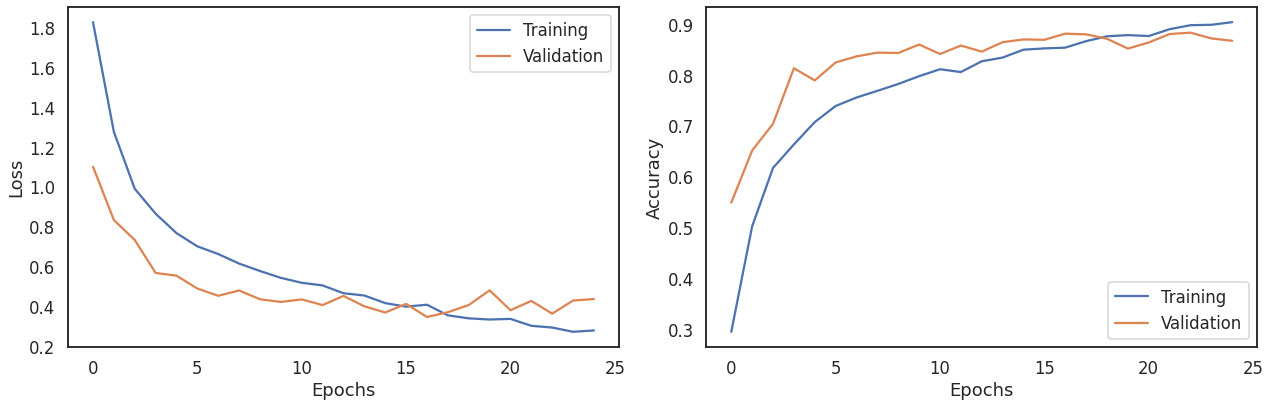

In [126]:
f, axes = plt.subplots(1,2, figsize=(18,6))

ax = axes[0]
sns.lineplot(x=range(EPOCHS_CNN), y=history.history['loss'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_CNN), y=history.history['val_loss'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")


ax = axes[1]
sns.lineplot(x=range(EPOCHS_CNN), y=history.history['accuracy'], label='Training', ax=ax)
sns.lineplot(x=range(EPOCHS_CNN), y=history.history['val_accuracy'], label='Validation', ax=ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

f.tight_layout()
plt.show()

In [127]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.4904 - accuracy: 0.8669


[0.4903840720653534, 0.8669000267982483]

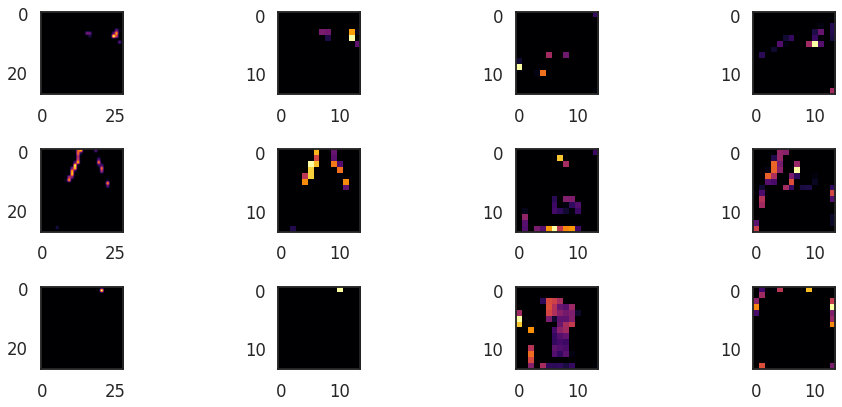

In [128]:
from tensorflow.keras import models

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6


f, axes = plt.subplots(3,4, figsize=(14,6))

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):  
    f1 = activation_model.predict(X_train[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axes[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[0,x].grid(False)

    f2 = activation_model.predict(X_train[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axes[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[1,x].grid(False)
    
    f3 = activation_model.predict(X_train[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axes[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axes[2,x].grid(False)

f.tight_layout()
plt.show()

In [117]:
#model.save("fashion_mnist.h5")